In [1]:
#Import packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

#### Import data

In [2]:
#Import exits
exits_gdf = gpd.read_file('../Data/MJBA/Exits.shp')

In [3]:
#Import dcfc as pandas dataframe
dcfc_df = pd.read_csv('../Data/NREL/DCFC.csv')
dcfc_df.shape

(68, 37)

In [4]:
#Create geometries for dcfc features
geom = [Point(xy) for xy in zip(dcfc_df['longitude'],dcfc_df['latitude'])]

In [9]:
#Create the geopandas geodataframe from above
dcfc_gdf = gpd.GeoDataFrame(dcfc_df,geometry=geom,crs=4326)

#### Coordinate reference systems

In [11]:
#Show current crs
print(exits_gdf.crs)
print(dcfc_gdf.crs)

epsg:4326
epsg:4326


In [12]:
exits_gdf = exits_gdf.to_crs(32617)
dcfc_gdf= dcfc_gdf.to_crs(32617)

In [13]:
print(exits_gdf.crs)
print(dcfc_gdf.crs)

epsg:32617
epsg:32617


#### Compute nearest points

In [15]:
dcfc_gdf['geometry']

0     POINT (534257.311 3916588.084)
1     POINT (686367.515 3879655.715)
2     POINT (634754.682 3992033.866)
3     POINT (684225.197 3982608.235)
4     POINT (487292.040 3902008.629)
                   ...              
63    POINT (999687.794 3925415.130)
64    POINT (673107.777 3943839.623)
65    POINT (778950.405 3918250.618)
66    POINT (585873.322 3868542.214)
67    POINT (688330.714 3812514.371)
Name: geometry, Length: 68, dtype: geometry

In [16]:
mp_dcfc = dcfc_gdf['geometry'].unary_union
type(mp_dcfc)

shapely.geometry.multipoint.MultiPoint

In [17]:
def distance_to_dcfc(thePoint,mp_dcfc):
    fromPt, toPt = nearest_points(thePoint,mp_dcfc)
    theDistance = fromPt.distance(toPt)
    return theDistance

In [18]:
theDistances = exits_gdf['geometry'].apply(lambda x: distance_to_dcfc(x,mp_dcfc))

In [20]:
exits_gdf['Dist_to_DCFC'] = theDistances

In [21]:
exits_gdf.head()

,FID,Exit_ID,Longitude,Latitude,County,State,Highway,Type,AADT,Pop_dens,Comm_1mi,Ports_5mi,Ports_10mi,Ports_20mi,Close_nonT,geometry,Dist_to_DCFC
0,7059,US-64_Cherokee_NC_Exit_1,-84.314304,35.019492,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.34979,1,0,0,0,34.094152,POINT (197578.012 3880227.389),165798.703240
1,7060,US-64_Cherokee_NC_Exit_2,-84.311492,35.014933,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.34979,1,0,0,0,34.365230,POINT (197817.907 3879713.054),165735.785722
2,7061,US-64_Cherokee_NC_Exit_3,-84.295528,35.013561,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,35.233979,POINT (199270.172 3879512.464),164426.238471
3,7062,US-64_Cherokee_NC_Exit_4,-84.280291,35.012880,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,36.048303,POINT (200658.638 3879391.092),163153.582530
4,7063,US-64_Cherokee_NC_Exit_5,-84.275190,35.017816,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,36.186597,POINT (201142.266 3879923.503),162522.336504


In [65]:
exits_gdf.to_file('../Data/processed/Exits_distance_to_DCFC.shp')

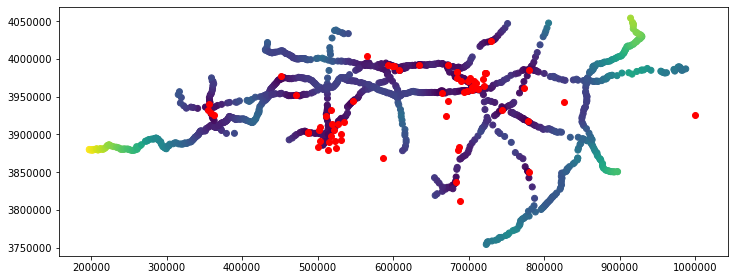

In [69]:
my_axes = exits_gdf.plot('Dist_to_DCFC',figsize=(12,6))
dcfc_gdf.plot(ax=my_axes,color='red')